**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

**Read file**

In [2]:
df = pd.read_csv('fraud_detection_bank_dataset.csv')
df.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [3]:
print("Shape of dataset : {} ".format(df.shape))

Shape of dataset : (20468, 114) 


**Let's see about missing value**

In [4]:
print("total column that contain null value : {}".format(df.isnull().sum().sum()))

total column that contain null value : 0


**There are no missing value we are good to go.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


**All features of dataset are numeric**

In [6]:
df.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


**If column contain only one unique value than that column is not important let's check.**

In [7]:
for col in df.columns:
    if len(df[col].unique()) == 0:
        print(col, " ")

**Here is correlation matrix of top 35 value that mostly correlated with targets columns.**

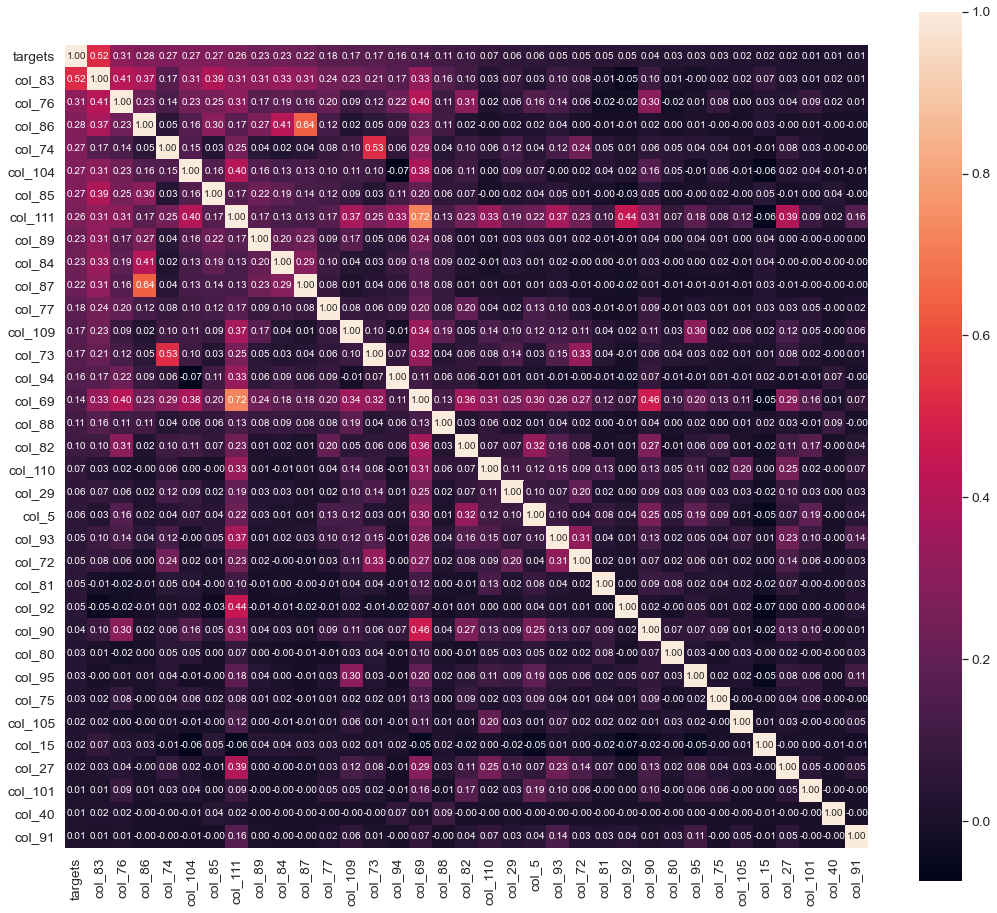

In [8]:
plt.figure(figsize = (18, 16))
corrmat = df.corr()
k = 35 #number of variables for heatmap
cols = corrmat.nlargest(k, 'targets')['targets'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
df['targets'].value_counts()

0    15030
1     5438
Name: targets, dtype: int64

**Our datasets is Imbalanced so it may increase error so make it balanced.**

In [10]:
df_0 = df[df['targets']==0][:5438]

In [11]:
df_0['targets'].value_counts()

0    5438
Name: targets, dtype: int64

In [12]:
df_1 = df[df['targets'] == 1]

In [13]:
df_1.shape

(5438, 114)

concat df_0 and df_1

In [14]:
df = pd.concat([df_0, df_1], axis=0)

In [15]:
df.shape

(10876, 114)

In [16]:
X = df.drop('targets', axis=1)
y = df['targets']

**Convert into standardscaler**

In [17]:
X = StandardScaler().fit_transform(X)

**Split into train and test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8700, 113), (2176, 113), (8700,), (2176,))

**Linear Regression**

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9972426470588235

**Confusion matrix for Linear regression**

<AxesSubplot:>

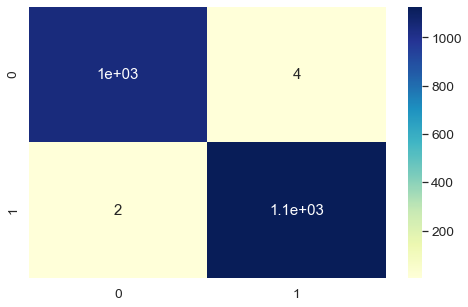

In [20]:
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

**Classification report for linear regression.**

In [21]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1046\n           1       1.00      1.00      1.00      1130\n\n    accuracy                           1.00      2176\n   macro avg       1.00      1.00      1.00      2176\nweighted avg       1.00      1.00      1.00      2176\n'

**Decision Tree Classifier**

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

1.0

**Confusion matrix for Decision Tree Classifier**

<AxesSubplot:>

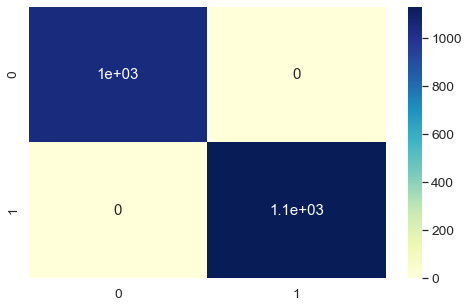

In [23]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (8,5))
sns.heatmap(df_cm, annot=True, cmap='YlGnBu')

**Classification report for Decision tree classifier**

In [24]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1046\n           1       1.00      1.00      1.00      1130\n\n    accuracy                           1.00      2176\n   macro avg       1.00      1.00      1.00      2176\nweighted avg       1.00      1.00      1.00      2176\n'

**We got the best accuracy in DecisionTreeClassifier and it's 100% accurate**

**I tried with only highly correlated columns and it's accuracy was very low so I decided to use all columns and you can see the results.**